TEAM MEMBER IS

*   Oubousken Ilyas
*   Nguyen Le Khang
*   Nguyen Sieng


[Link download of the dataset](https://www.kaggle.com/datasets/uciml/glass?resource=download) --Glass Classification

In [1]:
## upload the file glass
from google.colab import files
upload = files.upload()

Saving archive.zip to archive.zip


*The stucture we applied here is to following all the requirements in order*





Part 1: Familiarization and Basic Testing of the SVM Algorithm

**1.1 Dataset Selection**

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os
df = pd.read_csv('archive.zip') ## you don't need to decompess the file

print("Dataset Shape:", df.shape)
print("First 5 rows of the dataset:")
df.head()

Dataset Shape: (214, 10)
First 5 rows of the dataset:


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
## check for any missing values
print("Missing values in each column:")
df.isnull().sum().sum()

Missing values in each column:


0

In [4]:
## check for duplicate values
duplicates = df.duplicated()
total_duplicate = duplicates.sum()
print(f'Total duplicate record:\n{total_duplicate}\n')

Total duplicate record:
1



In [5]:
data = df.drop_duplicates()
print(f'Total duplicate record:\n{data.duplicated().sum()}\n')

Total duplicate record:
0



In [6]:
## check if a file already exists and remove it
## export to a new cleaned csv file
file_name = 'glass_clasification_cleaned_data.csv'
if os.path.exists(file_name):
  os.remove(file_name)
data.to_csv(file_name, index=False)

**1.2 Algorithm Application**

In [7]:
## separate features (X) and the target variable (y)
X = data.drop('Type', axis=1)
y = data['Type']

## split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## normalize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## apply SVM with a linear kernel
linear_svc = SVC(kernel='linear', random_state=42)
linear_svc.fit(X_train, y_train)
y_pred_linear = linear_svc.predict(X_test)

print("Linear Kernel Performance:\n")
print(classification_report(y_test, y_pred_linear))

Linear Kernel Performance:

              precision    recall  f1-score   support

           1       0.64      0.90      0.75        10
           2       0.77      0.67      0.71        15
           3       0.00      0.00      0.00         3
           5       0.60      1.00      0.75         3
           6       1.00      0.67      0.80         3
           7       1.00      0.78      0.88         9

    accuracy                           0.72        43
   macro avg       0.67      0.67      0.65        43
weighted avg       0.74      0.72      0.71        43



In [13]:
## apply SVM with a polynomial kernel (degree 3)
poly_svc = SVC(kernel='poly', degree=3, random_state=42)
poly_svc.fit(X_train, y_train)
y_pred_poly = poly_svc.predict(X_test)

print("Polynomial Kernel Performance:\n")
print(classification_report(y_test, y_pred_poly, zero_division=0))


Polynomial Kernel Performance:

              precision    recall  f1-score   support

           1       0.43      1.00      0.61        10
           2       0.45      0.33      0.38        15
           3       0.00      0.00      0.00         3
           5       0.50      0.33      0.40         3
           6       0.00      0.00      0.00         3
           7       1.00      0.78      0.88         9

    accuracy                           0.53        43
   macro avg       0.40      0.41      0.38        43
weighted avg       0.50      0.53      0.49        43



**1.3 Use Case Identification**
1. Fraud Detection: SVM can help banks detect fraud by analyzing transactions. For instance, it can predict if a transaction is "fraudulent" or "safe" based on patterns like location, time, and amount.

2. Face Recognition: SVM can be used in security systems to recognize faces. For example, it can compare a person’s photo with stored images to decide if it’s a match, like unlocking a phone using your face.



Part 2: In-Depth Experimentation with the SVM Algorithm

**2.1 Parameter Experimentation**

In [9]:
## experiment with Polynomial Kernel (degree=4)
poly_svc_deg4 = SVC(kernel='poly', degree=4, C=10, class_weight='balanced', random_state=42)
poly_svc_deg4.fit(X_train, y_train)
y_pred_poly_deg4 = poly_svc_deg4.predict(X_test)
print("Polynomial Kernel (degree=4) Performance with Class Balancing:\n")
print(classification_report(y_test, y_pred_poly_deg4, zero_division=0))

Polynomial Kernel (degree=4) Performance with Class Balancing:

              precision    recall  f1-score   support

           1       0.56      1.00      0.71        10
           2       1.00      0.60      0.75        15
           3       0.00      0.00      0.00         3
           5       0.50      0.33      0.40         3
           6       0.43      1.00      0.60         3
           7       1.00      0.78      0.88         9

    accuracy                           0.70        43
   macro avg       0.58      0.62      0.56        43
weighted avg       0.75      0.70      0.68        43



**2.3 Kernel Comparison**

In [10]:
## compare with RBF Kernel
rbf_svc = SVC(kernel='rbf', class_weight='balanced', random_state=42)
rbf_svc.fit(X_train, y_train)
y_pred_rbf = rbf_svc.predict(X_test)

print("RBF Kernel Performance:\n")
print(classification_report(y_test, y_pred_rbf, zero_division=0))

RBF Kernel Performance:

              precision    recall  f1-score   support

           1       0.70      0.70      0.70        10
           2       0.69      0.73      0.71        15
           3       0.25      0.33      0.29         3
           5       0.50      0.33      0.40         3
           6       1.00      1.00      1.00         3
           7       1.00      0.89      0.94         9

    accuracy                           0.72        43
   macro avg       0.69      0.66      0.67        43
weighted avg       0.73      0.72      0.72        43



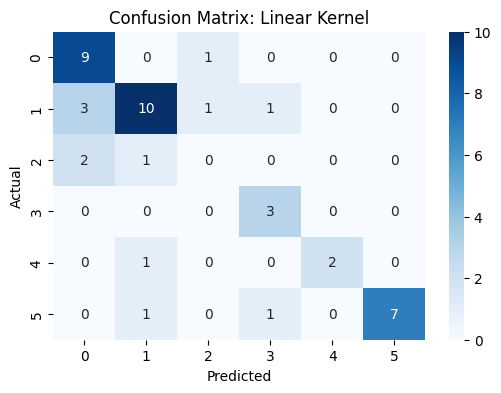

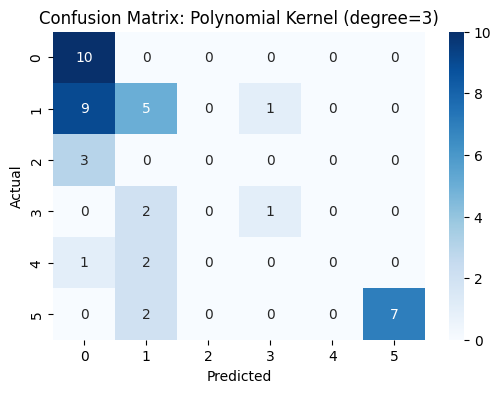

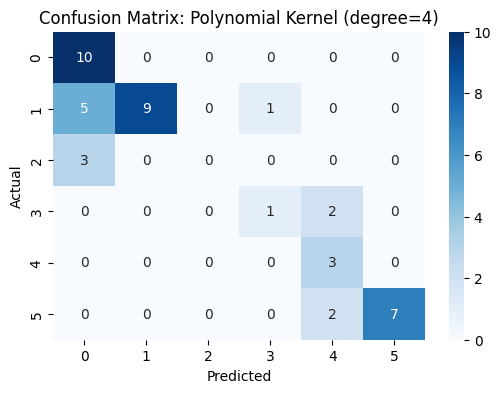

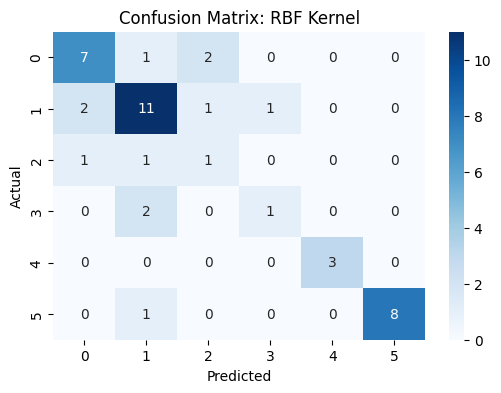

In [11]:
## Visualization of Confusion Matrice

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

## plot confusion matrices for each kernel
plot_confusion_matrix(y_test, y_pred_linear, "Confusion Matrix: Linear Kernel")
print("\n")
plot_confusion_matrix(y_test, y_pred_poly, "Confusion Matrix: Polynomial Kernel (degree=3)")
print("\n")
plot_confusion_matrix(y_test, y_pred_poly_deg4, "Confusion Matrix: Polynomial Kernel (degree=4)")
print("\n")
plot_confusion_matrix(y_test, y_pred_rbf, "Confusion Matrix: RBF Kernel")